# QUESTION: Do high-priced products have a "bias" in ratings due to higher expectations from customers?

## 1. Data Preparation
**Objective:**

Prepare the dataset for analysis by ensuring cleanliness and consistency.

**Techniques:**
- **Data Cleaning:** Remove missing, irrelevant, or duplicate data.
- **Column Renaming:** Ensure uniformity and meaningful column names.

**Steps:**
- Load the dataset 
- Inspect the data for missing or incorrect values using methods like ```info()```, ```isnull().sum()```, and visual checks.
- Rename columns to ensure clarity and ease of understanding.
- Save the cleaned dataset for further analysis.

**Relevant Techniques:**
- Pandas library for data manipulation.
- Exploratory Data Analysis (EDA) to identify and fix issues in the data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

# Load the dataset
data_file = 'Data/Data.csv'
df = pd.read_csv(data_file)

# Ensure necessary columns exist
if 'Giá' not in df.columns or 'Điểm đánh giá trung bình' not in df.columns:
    raise ValueError("Dataset must contain 'Giá' (Price) and 'Điểm đánh giá trung bình' (Rating) columns.")

# Rename columns for easier access
df.rename(columns={
    'Giá': 'Price',
    'Điểm đánh giá trung bình': 'Rating'
}, inplace=True)

## 2. Segmentation by Price Range
**Objective:**

Divide the dataset into categories based on price to analyze differences in ratings.

**Techniques:**
- **Quantile Segmentation:** Divide data into quartiles or predefined ranges.
- **Conditional Statements:** Use custom conditions to group data.

**Steps:**
- Use ```pd.qcut()``` or ```pd.cut()``` to segment products into "low," "medium," and "high" price ranges.
- Assign a new column, ```Price Category```, based on the segmentation.
- Verify the segmentation with summary statistics (```describe()```).

**Relevant Techniques:**
- Statistical segmentation based on quantiles or custom thresholds.
- EDA to ensure fair distribution among categories.


In [4]:
# Step 1: Data Segmentation (Divide products into price ranges)
price_bins = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])
df['Price Range'] = price_bins

## 3. Visualizations
**Objective:**

Use visual tools to identify patterns or anomalies in ratings across price ranges.

**Techniques:**
- **Boxplot:** Show the distribution of ratings for each price range.
- **Scatter Plot with Trend Line:** Reveal non-linear relationships.
- **Standard Deviation Plot:** Observe variability in ratings.

**Steps:**
- Create boxplots for each price range using ```seaborn.boxplot()```.
- Generate scatter plots with a trend line using ```seaborn.regplot()```.
- Plot the standard deviation of ratings against price using ```matplotlib``` or ```seaborn```.

**Relevant Techniques:**
- Descriptive statistics for understanding data spread.
- Visualization libraries: ```seaborn```, ```matplotlib```.


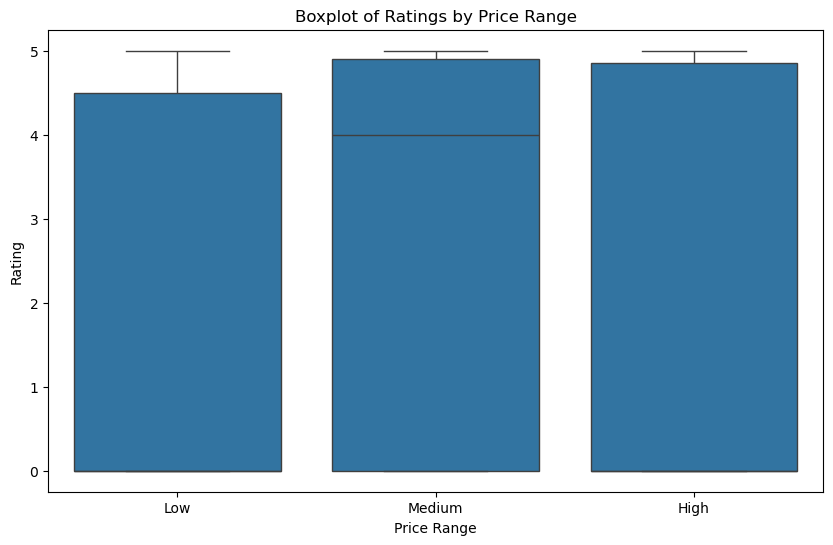

C:\Users\HP\AppData\Local\Temp\ipykernel_36344\2299355923.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev_ratings = df.groupby('Price Range')['Rating'].std()


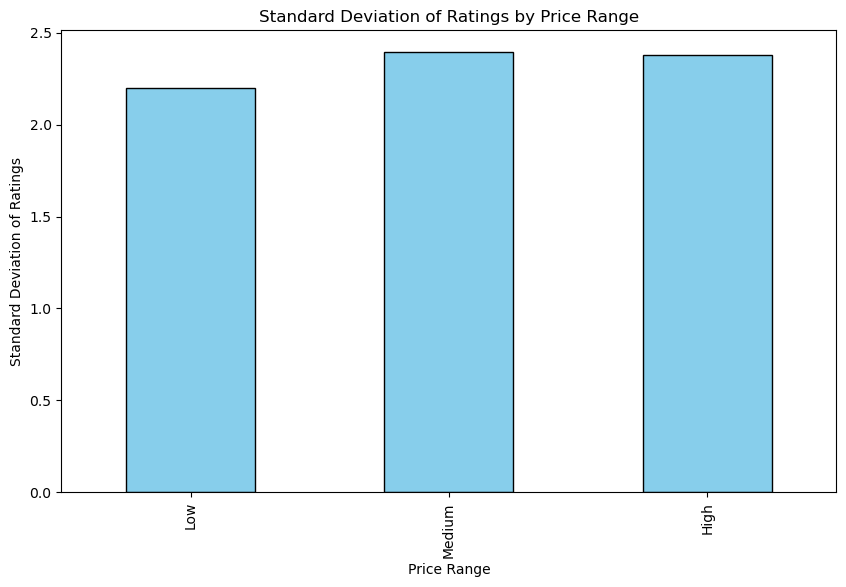

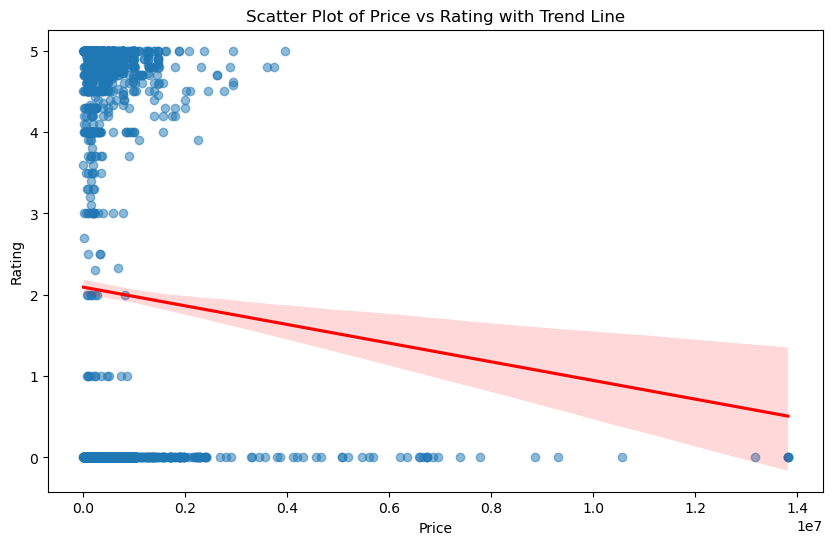

In [5]:
# Step 2: Visualizations
# Boxplot for Rating by Price Range
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Price Range', y='Rating')
plt.title('Boxplot of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Standard Deviation Analysis (Plot Std Dev of Ratings vs Price Range)
std_dev_ratings = df.groupby('Price Range')['Rating'].std()
plt.figure(figsize=(10, 6))
std_dev_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Standard Deviation of Ratings')
plt.show()

# Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Price', y='Rating', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Price vs Rating with Trend Line')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

## 4. Statistical Testing
**Objective:**

Test if the differences in ratings across price ranges are statistically significant.

**Techniques:**
- **ANOVA (Analysis of Variance):** Compare means across groups.
- **Variance Analysis:** Check for differences in the spread of ratings.

**Steps:**
- Use ```scipy.stats.f_oneway()``` to perform the ANOVA test.
- Calculate variance for each price category using ```pandas``` or ```numpy```.
- Interpret the p-value to determine significance.

**Relevant Techniques:**
- Statistical hypothesis testing.
- Analysis of variance and variability.

In [6]:
# Step 3: Statistical Test (ANOVA)
low_ratings = df[df['Price Range'] == 'Low']['Rating']
medium_ratings = df[df['Price Range'] == 'Medium']['Rating']
high_ratings = df[df['Price Range'] == 'High']['Rating']

anova_result = f_oneway(low_ratings, medium_ratings, high_ratings)

# Variance in Ratings for Each Price Range
variance_ratings = df.groupby('Price Range')['Rating'].var()

# Output Results
print("ANOVA Test Results:")
print(f"F-statistic: {anova_result.statistic:.3f}, p-value: {anova_result.pvalue:.3e}")
print("\nVariance in Ratings by Price Range:")
print(variance_ratings)


ANOVA Test Results:
F-statistic: 41.790, p-value: 1.265e-18

Variance in Ratings by Price Range:
Price Range
Low       4.847391
Medium    5.731701
High      5.669938
Name: Rating, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_36344\769348128.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  variance_ratings = df.groupby('Price Range')['Rating'].var()


## 5. Expected Outcomes
**Objective:**

Interpret the results to identify potential biases.

**Techniques:**
- **Inferential Statistics:** Draw conclusions about the population based on sample data.
- **Descriptive Patterns:** Use visual and numerical summaries.

**Steps:**
- If high-priced products have a higher standard deviation, it may indicate polarizing opinions due to heightened expectations.
- If ANOVA shows significant differences, the price impacts customer ratings.

**Relevant Techniques:**
- Data interpretation using applied statistics.
- Combining visual insights with statistical evidence.

In [7]:
# Insights
if anova_result.pvalue < 0.05:
    print("\nThe mean ratings differ significantly across price groups.")
else:
    print("\nThe mean ratings do not differ significantly across price groups.")



The mean ratings differ significantly across price groups.


## Conclusion Based on the Visualizations
**Boxplot of Ratings by Price Range:**

- The median rating is consistent across the three price ranges (Low, Medium, High), indicating that the central tendency of customer ratings is not significantly affected by the price range.
- However, there is some variability in ratings across all price ranges, as shown by the box heights and whiskers.

**Standard Deviation of Ratings by Price Range:**

- The standard deviation is relatively consistent across all price ranges, meaning the spread of ratings is similar regardless of whether the product is in the Low, Medium, or High price range.
- This suggests that variability in ratings does not strongly depend on the price range.

**Scatter Plot of Price vs. Rating with Trend Line:**

- The scatter plot shows a weak negative correlation between price and rating, as indicated by the downward trend of the regression line.
- This implies that, generally, as the price increases, the ratings tend to slightly decrease, but the trend is not strong enough to draw definitive conclusions.

## Final Answer:
There is no substantial evidence to suggest that price significantly impacts product ratings. While there is a slight negative correlation, the boxplot and standard deviation analysis reveal that the distribution and variability of ratings remain consistent across different price ranges. Other factors beyond price might play a more critical role in influencing product ratings.